In [46]:
# Summary of Transformation Learning
# 1) Import Necessary package/libraries
# 2) Load the dataset
# 3) Preprocess the data
# 4) Load weights of pre-trained model ***********Transfer learning
# 5) Fine Tune the model for the current problem
# 6) Get prediction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, LeakyReLU, InputLayer
from keras.layers import Conv2D, MaxPooling2D

In [2]:
data = pd.read_csv(r'C:\Users\younu\Desktop\My Py Scripts\Git Repos\11_Emergency Vehicle Detection\Dataset\emergency_classification.csv')
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [3]:
# Load images and store in a numpy array
x = []

for img_name in data.image_names:
    img = plt.imread(r"C:\Users\younu\Desktop\My Py Scripts\Git Repos\11_Emergency Vehicle Detection\Dataset\images/" + img_name)
    x.append(img)
    
x = np.array(x)
y = data['emergency_or_not']

In [4]:
x.shape

(2352, 224, 224, 3)

In [5]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2347    0
2348    0
2349    0
2350    0
2351    0
Name: emergency_or_not, Length: 2352, dtype: int64

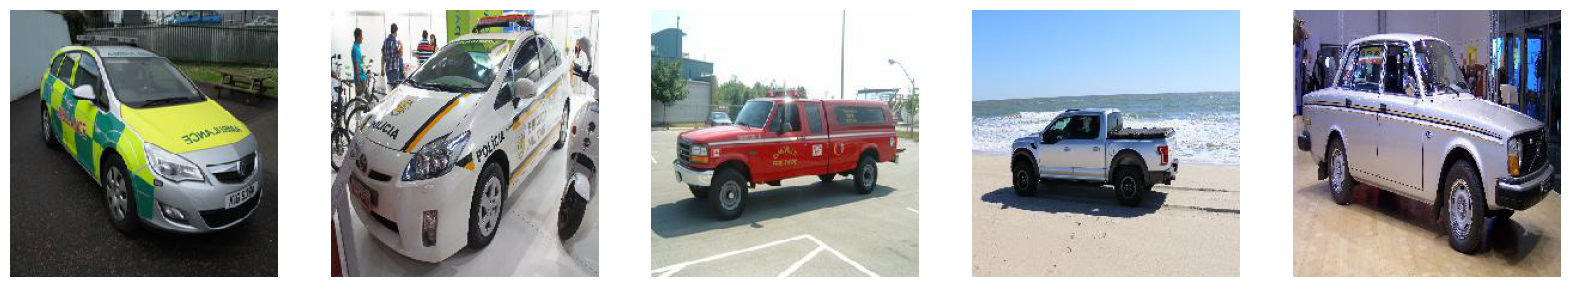

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 20))
for i in range(5):
    ax[i].imshow(x[i * 400])  # 400 is any random inage
    ax[i].axis('off')

In [7]:
x.max()

255

In [8]:
# Normalizing

x = x / x.max()
x.max()

1.0

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x.astype('float64'), y, 
                                                    test_size = 0.3, random_state = 0)
print(x_train.shape, x_test.shape)

(1646, 224, 224, 3) (706, 224, 224, 3)


### Attempt 1 : Understanding the model architecture

In [10]:
# Building simple CNN model

epochs = 10
batch_size = 128

# Create model

model = Sequential()
model.add(Conv2D(32, kernel_size = (7, 7), input_shape = (224, 224, 3), name = 'conv1'))
model.add(LeakyReLU(name = 'lrelu1'))
model.add(MaxPooling2D(pool_size = (4, 4), name = 'pool1'))

model.add(Conv2D(32, kernel_size = (7, 7), name = 'conv2'))
model.add(LeakyReLU(name = 'lrelu2'))
model.add(MaxPooling2D(pool_size = (4, 4), name = 'pool2'))

model.add(Conv2D(32, kernel_size = (7, 7), name = 'conv3'))
model.add(LeakyReLU(name = 'lrelu3'))
model.add(MaxPooling2D(pool_size = (4, 4), name = 'pool3'))

model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid', name = 'predict'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
             metrics = ['accuracy'])

trained_model = model.fit(x_train, y_train, epochs = epochs,
                         batch_size = batch_size, 
                         validation_data = (x_test, y_test))

C:\Users\younu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5345 - loss: 0.7168 - val_accuracy: 0.6558 - val_loss: 0.6348
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6627 - loss: 0.6090 - val_accuracy: 0.6898 - val_loss: 0.5802
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.6984 - loss: 0.5810 - val_accuracy: 0.7450 - val_loss: 0.5094
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7685 - loss: 0.4949 - val_accuracy: 0.8031 - val_loss: 0.4294
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.8028 - loss: 0.4509 - val_accuracy: 0.7975 - val_loss: 0.4227
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8327 - loss: 0.4077 - val_accuracy: 0.8074 - val_loss: 0.4012
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8397 - loss: 0.3821 - val_accuracy: 0.8116 - val_loss: 0.3952
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.8414 - loss: 0.3616 - val_accuracy: 0.8244 - val_loss:

In [11]:
# Atempt 1 : Understanding Architecture

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 218, 218, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lrelu1 (LeakyReLU)              │ (None, 218, 218, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 48, 48, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lrelu2 (LeakyReLU)              │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 6, 6, 32)       │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lrelu3 (LeakyReLU)              │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predict (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,557 (1.20 MB)

 Trainable params: 105,185 (410.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 210,372 (821.77 KB)

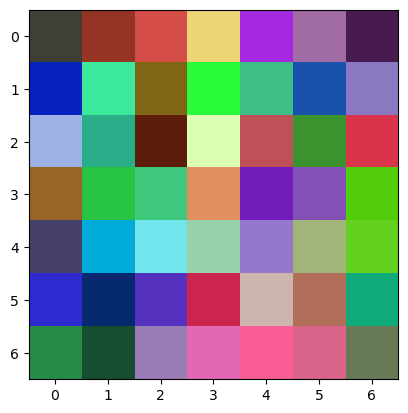

In [12]:
# Atempt 2 : Visualise filters and weights

temp = model.get_layer('conv1').get_weights()[0][:, :, :, 0]
# It will get the first conv layer and extract the weights [filter height, filter width, channel, output]
# Here we give 4D tensor [:, :, :, 0] to get the first output which is weight
# Then we normalise x - minimum vale / (x / maximum value)
temp -= temp.min()
temp /= temp.max()
plt.imshow(temp)
plt.show()

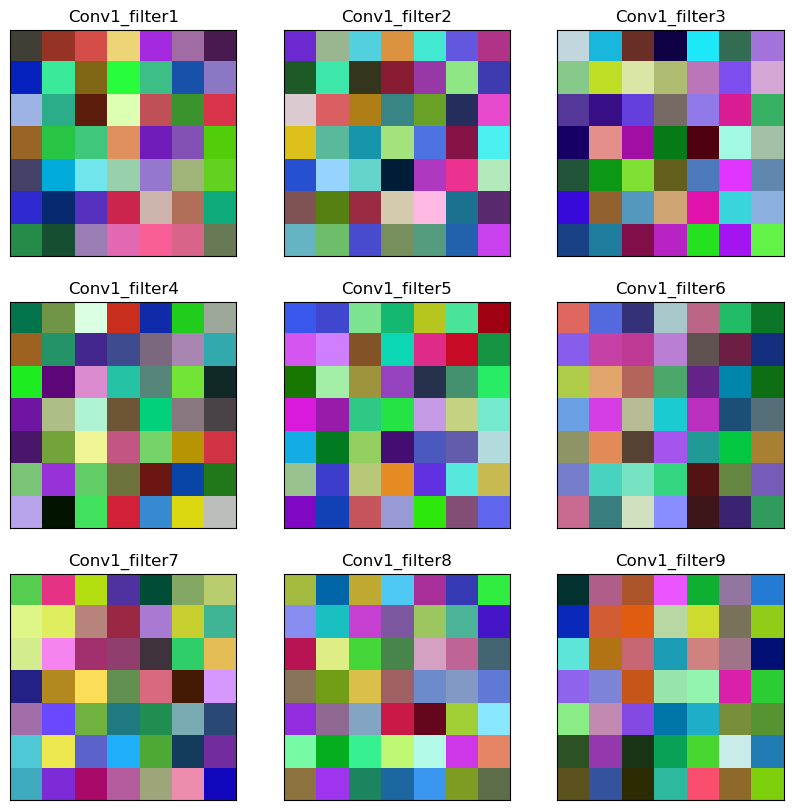

In [13]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (10, 10))
filter_no = 1

for i in range(3):
    for j in range(3):
        temp = model.get_layer('conv1').get_weights()[0][:, :, :, filter_no - 1]
        temp -= temp.min()
        temp /= temp.max()
        ax[i][j].imshow(temp)
        ax[i][j].set_title('Conv1' + '_filter' + str(filter_no))
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        filter_no += 1

In [14]:
# Atempt - 3 - Extract output of intermediate neurons / layers

eg_image_idx = 5
image = x_train[eg_image_idx]
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
intermediate_layer_model = Model(inputs = model.input, outputs = model.get_layer('conv1').output)
intermediate_output = intermediate_layer_model.predict(image)[0, :, :, 0]
plt.imshow(intermediate_output, cmap = 'gray')

ValueError: The layer sequential has never been called and thus has no defined input.

In [ ]:
# Thorough analysis of one image

layer_names= ['conv1', 'lrelu1', 'pool1', 'conv2']
outputs = []

eg_image_idx = 5
image = x_train[eg_image_idx]

plt.imshow(image)

image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

for layer_name in layer_names:
    intermediate_layer_model = Model(inputs = model.input, outputs = model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
    
fig, ax = plt.subplots(nrows = len(outputs), ncols = 4, figsize = (15, 15))

for i in range (len(outputs)):
    for z in range(4):
        ax[i][z].imshow(outputs[i][0, :, :, z], cmap = 'gray')
        ax[i][z].set_title(layer_names[i] + '_filter' + str(z - 1))
        ax[i][z].xticks([])
        ax[i][z].yticks([])

### Transfer Learning Model

In [15]:
from keras.applications.vgg16 import preprocess_input, VGG16
from keras.applications.resnet50 import ResNet50
from keras.utils import to_categorical

In [16]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2347    0
2348    0
2349    0
2350    0
2351    0
Name: emergency_or_not, Length: 2352, dtype: int64

In [17]:
y = keras.utils.to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [19]:
x.min(), x.max()  # Preprocessing done

(0.0, 1.0)

In [20]:
# TRain test split done

In [21]:
# Load weights of pretrained model

base_model = VGG16(weights = "imagenet")
base_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 90s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

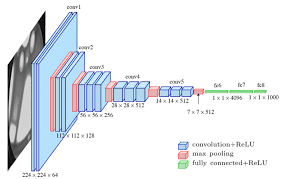

In [25]:
base_model = VGG16(weights = "imagenet", input_shape = (224, 224, 3),
                  include_top = False)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Applying the summary to our dataset

base_model_pred = base_model.predict(x_train)
base_model_pred_val = base_model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 328s 6s/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step


In [27]:
x_train.shape

(1646, 224, 224, 3)

In [28]:
base_model_pred.shape

(1646, 7, 7, 512)

In [30]:
base_model_pred = base_model_pred.reshape(1646, 7 * 7 * 512)
base_model_pred.shape

(1646, 25088)

In [31]:
base_model_pred_val = base_model_pred_val.reshape(706, 7 * 7 * 512)
base_model_pred_val.shape

(706, 25088)

In [33]:
max_val = base_model_pred.max()

In [35]:
base_model_pred = base_model_pred / max_val
base_model_pred_val = base_model_pred_val / max_val
base_model_pred.min(), base_model_pred.max()

(0.0, 0.09006409)

In [38]:
# Create Sequential model

model2 = Sequential()
model2.add(InputLayer((7 *7 * 512)))
model2.add(Dense(units = 1024, activation = 'relu'))
model2.add(Dense(units = 2, activation = 'softmax'))
model2.compile(optimizer = 'adam', metrics = ['accuracy'],
              loss = 'categorical_crossentropy')
model2.summary()

ValueError: Cannot convert '25088' to a shape.

In [39]:
# reate a sequential model
# model = Sequential()
# model.add(InputLayer((7*7*512)))
# model.add(Dense(units=1024, activation='relu'))
# model.add(Dense(units=1, activation='sigmoid'))
# model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
# model.summary()

ValueError: Cannot convert '25088' to a shape.

In [41]:
model2.fit(base_model_pred, y_train, epochs=10,
           batch_size=128, 
           validation_data = (base_model_pred_val, y_test))

ValueError: You must call `compile()` before using the model.

In [44]:
# Get Predictions

predictions = model2.predict(base_model_pred_val)
predictions = predictions.reshape(-1,)
predictions_int = predictions >=0.5
predictions_int = predictions_int.astype(int)
predictions_int

ValueError: Sequential model sequential_3 cannot be built because it has no layers. Call `model.add(layer)`.

In [45]:
# Summary of Transformation Learning
# 1) Import Necessary package/libraries
# 2) Load the dataset
# 3) Preprocess the data
# 4) Load weights of pre-trained model ***********Transfer learning
# 5) Fine Tune the model for the current problem
# 6) Get prediction